# **Pandas Seaborn SciPy**
## *Gestione, Analisi e Visualizzazione dei Dati*
Introduzione ed esercizi sulle librerie **Pandas**, **Seaborn** e **SciPy**

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.signal import savgol_filter
from scipy.stats import norm, uniform

## **Pandas**

**Pandas** utilizza delle strutture chiamate **dataframe** per rappresentare i dati
presenti all’interno di un **dataset**. I dataset contenggono una serie di campioni descritti da una o più **feature**.

Per leggere un dataset contenuto in un file CSV si ha a disposizione `read_csv`, ma possiamo leggere anche altri tipi di file (`read_excel`, `read_json`)

Leggiamo ad esempio il dataset relativo al Titanic, e mostriamone le prime cinque righe.

In [50]:
titanic = pd.read_csv('DataSet//titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In questo caso le *features* sono:
- **PassengerId**
- **Survived**
- **Pclass**
- **Name**
- **...**
- **Embarked**

In particolare è possibile accedere alle singole colonne mediante il nome della *Features*

Estraiamo la **serie** contenente tutti i nomi dei passeggeri.

In [51]:
names = titanic['Name']
names.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Di default Pandas imposta una colonna numerica $[0,1,2,3...]$ come **indice**. In particolare è possibile impostare una feature come *indice* utilizzato per il dataframe. 

Ad esempio impostiamo come indice del DataFrame la features `Ticket` e mostriamo a schermo il nome del passeggero il cui biglietto è pari a **STON/02. 3101282**.



In [52]:
titanic.set_index('Ticket', inplace=True) # Di default inplace=False; se uso inplace=True modifco il DataFrame
titanic.loc['STON/O2. 3101282', 'Name']

'Heikkinen, Miss. Laina'

Possiamo anche accedere in scrittura ad un attributo. In questo caso, usiamo `loc()`, ma per farlo possiamo usare anche `iloc()`:

In [53]:
titanic.loc['STON/O2. 3101282', 'Name'] = 'Pippo'

Possiamo anche accedere all'interno dato mediante la funzione `loc()`:

In [54]:
titanic.loc['STON/O2. 3101282', :]      # Lo slicing può essere omesso
                                        # Estraggo tutta la serie associata al passeggero con indice (ticket) "STON/O2. 3101282"

PassengerId         3
Survived            1
Pclass              3
Name            Pippo
Sex            female
Age              26.0
SibSp               0
Parch               0
Fare            7.925
Cabin             NaN
Embarked            S
Name: STON/O2. 3101282, dtype: object

Proviamo ad accedere a classe e nome dei passeggeri che vanno dal terzo al quinto.

`iloc[a:b, c:d]`

*indici* a:b  *features* c:d

In [55]:
print(titanic.iloc[2:5, 2:4])

                  Pclass                                          Name
Ticket                                                                
STON/O2. 3101282       3                                         Pippo
113803                 1  Futrelle, Mrs. Jacques Heath (Lily May Peel)
373450                 3                      Allen, Mr. William Henry


Si può accedere al dataframe anche attraverso maschera booleana. Ad esempio cerchiamo i maschi maggiorenni:

In [56]:
maggiorenni_male = titanic[((titanic['Age'] > 18 ) & (titanic['Sex'] == 'male'))] #DataSet Estratto
maggiorenni_male

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Ticket,,,,,,,,,,,
A/5 21171,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
373450,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
17463,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
A/5. 2151,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,8.0500,NaN,S
347082,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
C.A./SOTON 34068,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,10.5000,NaN,S
SOTON/OQ 392076,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,7.0500,NaN,S
211536,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S


Vediamo come aggiungere una nuova colonna ad un dataframe. In particolare, creiamo un dataframe fatto da un'unica colonna di numeri interi, ed aggiungiamovene un'altra pari esattamente al doppio della prima.

In [57]:
df = pd.DataFrame([1,2,3,4,5], columns=['one'])     
df['due'] = df['one'] * 2
df

,one,due
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


La stessa operazione può essere effettuata con il metodo `concat()`, che accetta, tra i vari parametri, la lista dei dataframe da concatenare e l'asse sul quale effettuare l'operazione. In particolare, proviamo ad effettuarla aggiungendo prima una colonna:

In [58]:
df_three_vals = df['one'] * 3  # Sto moltiplicando la serie relativa alla Features 'one' per tre
df_three = pd.DataFrame([3, 4, 5, 6,7], columns=['three'])
df_new_col = pd.concat([df, df_three], axis=1) # axis=1 colonne axis=0 riga
df_new_col 

,one,due,three
0,1,2,3
1,2,4,4
2,3,6,5
3,4,8,6
4,5,10,7


e poi una riga:

In [59]:
df_add = pd.DataFrame([[6, 12, 18]], columns=['one', 'due', 'three']) # Deve avere le stesse colonne del DataFrame di partenza
df_last = pd.concat([df_new_col, df_add])
df_last.reset_index(inplace=True) # Se non lo faccio dopo concat si porta l'indice dietro e avrei in questo caso due indici uguali
df_last.drop(['index'], axis=1, inplace=True) # Cancella la colonna con il nome "index"
df_last

,one,due,three
0,1,2,3
1,2,4,4
2,3,6,5
3,4,8,6
4,5,10,7
5,6,12,18


Usiamo la funzione `describe()` per descrivere il dataset.

In [60]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Visualizziamo in ultimo a schermo due istogrammi che descrivano l'età ed il sesso dei passeggeri.

<AxesSubplot:>

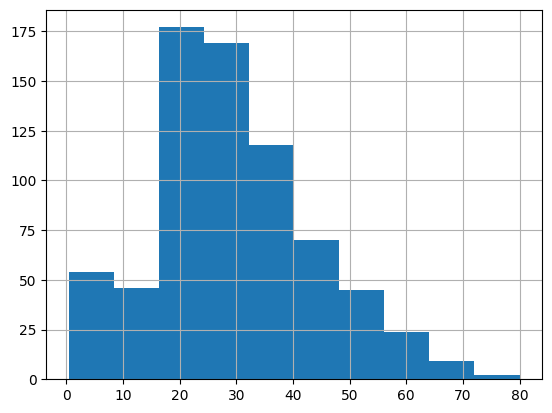

In [61]:
titanic['Age'].hist()

<AxesSubplot:>

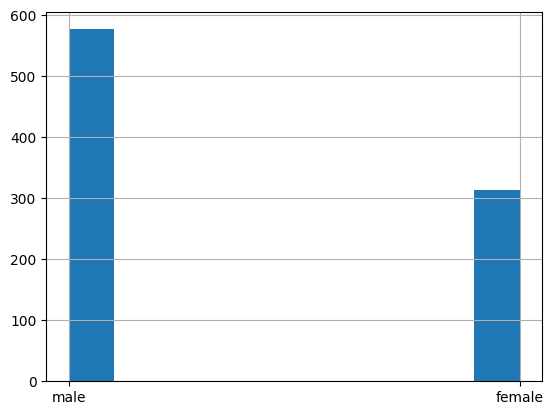

In [62]:
titanic['Sex'].hist()

In [63]:
titanic.corr() # Analisi di correlazione con l'indice di Pearson

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## **Seaborn**

**Seaborn** è una libreria basata su Matplotlib per la visualizzazione avanzata dei dati, ci offre una serie di strumenti appositamente dedicati per metterci un'analisi esplorativa:

- Visualizzare delle **relazioni** tra dati
- Effettuare **interpolazioni**
- Visualizzare **distribuzioni**
- Costruire **heatmap**
- Analizzare dati **categorici**


Iniziamo caricando il dataset `tips`.

In [64]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Vediamo adesso quale è l'andamento del rapporto tra conto e mance giorno per giorno. Inoltre, diamo ai diversi simboli delle dimensioni direttamente proporzionali all'entità della mancia.

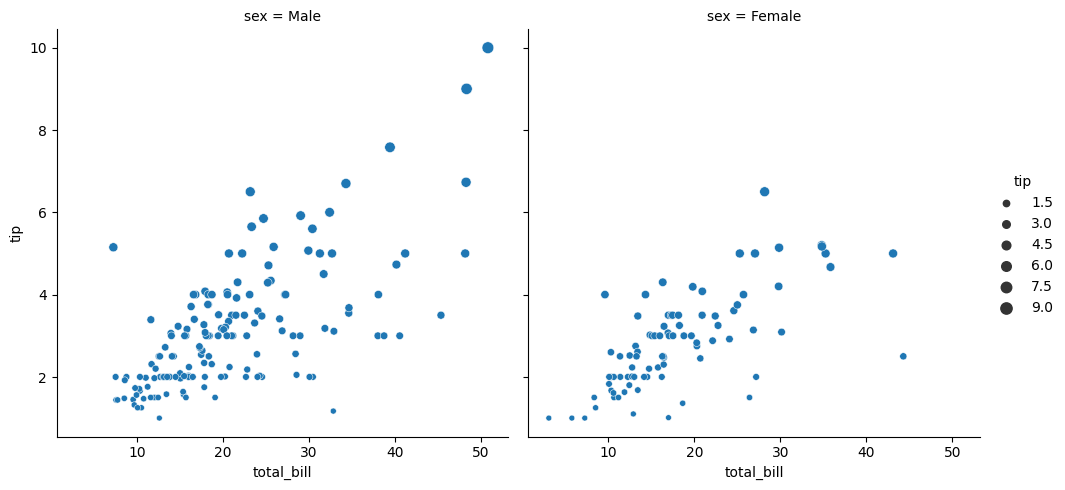

In [65]:
# relplot è uno scatter plot
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    col='sex',
    size='tip')

La funzione [`replot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html) ci offre un esempio di *scatter plot*, ovvero una particolare tipologia di grafico che viene spesso utilizzato per visualizzare come si "diffondono" dei dati su due o tre dimensioni.

Proviamo adesso a vedere come variano le mance in funzione del conto a seconda del fatto che i clienti siano uomini o donne:

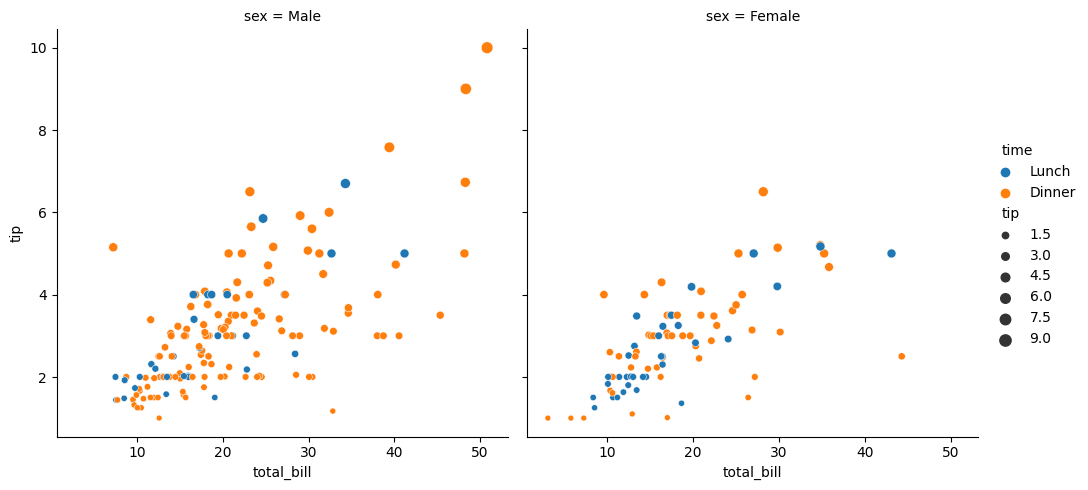

In [66]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    col='sex',
    size='tip',
    hue='time')

Nel grafico precedente abbiamo assegnato anche il parametro `hue`, che assegna una tinta differente a seconda del valore associato alla categoria indicata dal parametro (in questo caso, il giorno della settimana).

Una variante della funzione `relplot()` è la [`lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html), la cui sintassi e parametrizzazione è praticamente equivalente, ma che permette di integrare anche le approssimazioni ai minimi quadrati dei dati visualizzati. È possibile selezionare varie tecniche di regressione passando
diversi parametri alla funzione.

Ad esempio:

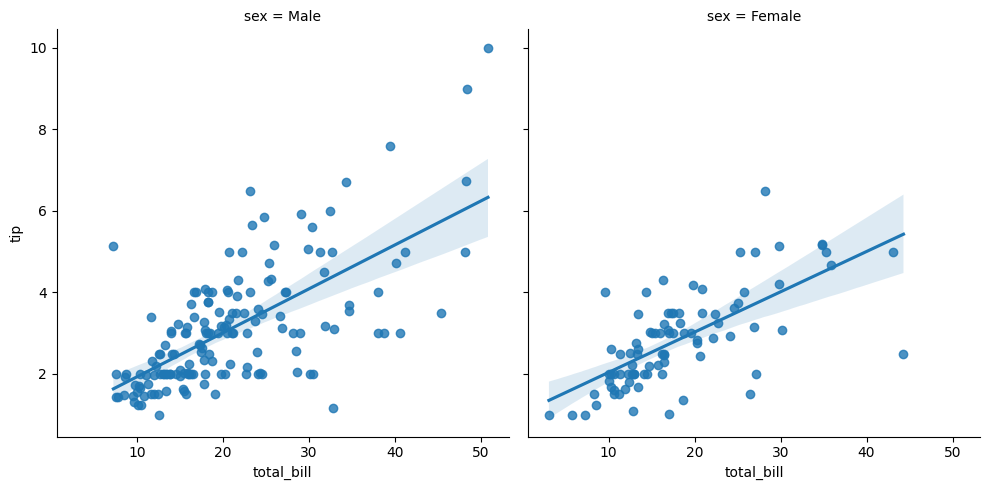

In [67]:
sns.lmplot(
    data=tips,
    x='total_bill',
    y='tip',
    col='sex')

Se proviamo ad impostare il parametro `hue` otterremo risultati più "granulari".

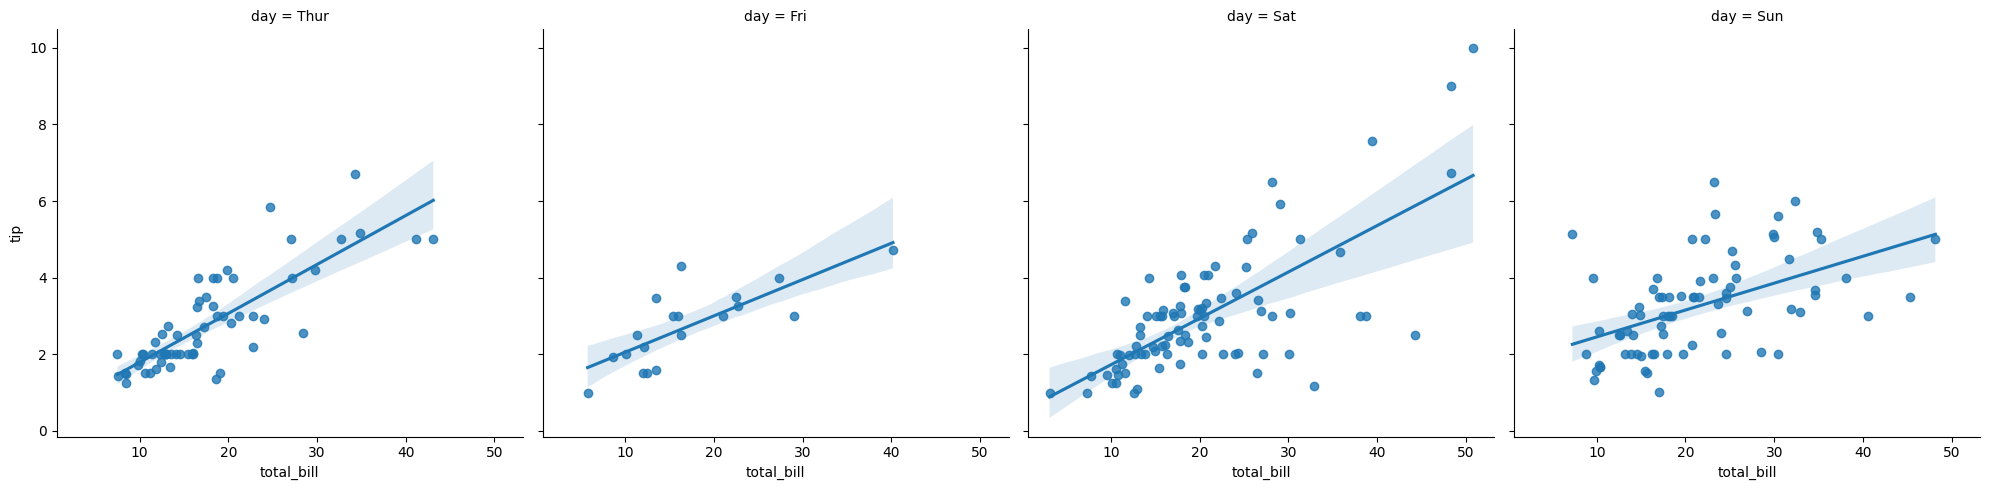

In [68]:
sns.lmplot(
    data=tips,
    x='total_bill',
    y='tip',
    col='day')

Dal grafico precedente possiamo quindi scoprire come il ristorante non sia aperto il sabato e la domenica a pranzo, oltre che il giovedì a cena.

La `lmplot()` non supporta esclusivamente regressioni di tipo lineare. Ad esempio, potremmo specificare il parametro `order`, che fa in modo che i punti siano approssimati mediante un polinomio di ordine pari al valore indicato.

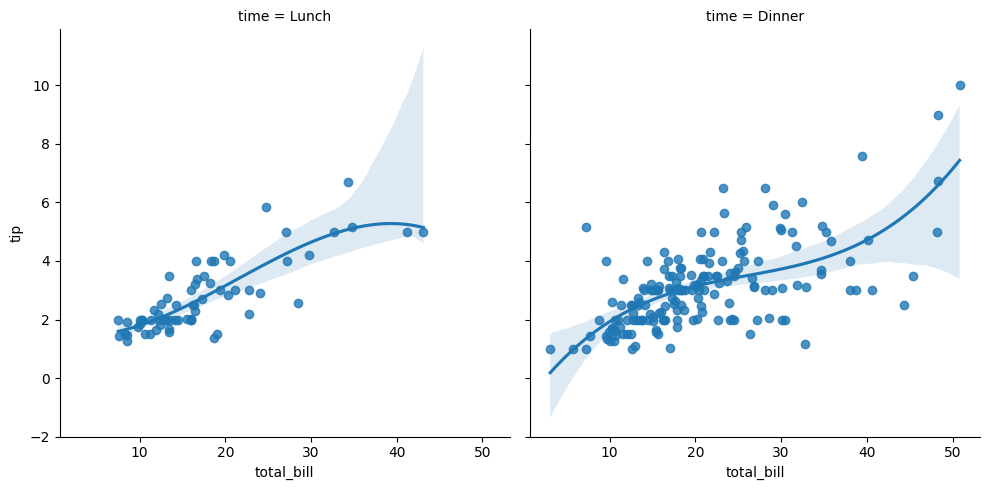

In [69]:
sns.lmplot(
    data=tips,
    x='total_bill',
    y='tip',
    col='time',
    order=3)
# plt.savefig('immagine.png')

Ancora, potremmo usare una regressione non parametrica mediante il parametro `lowess`, che in pratica calcola un modello lineare "a tratti", pesato sulla base dei valori assunti in determinati intervalli dall'insieme dei punti.

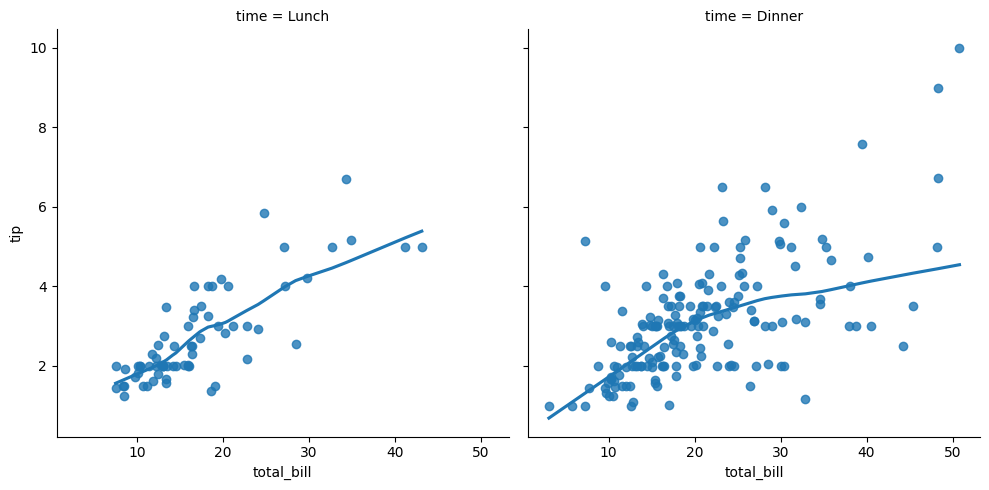

In [70]:
sns.lmplot(
    data=tips,
    x='total_bill',
    y='tip',
    col='time',
    lowess=True)

Esistono poi anche altre possibilità, come quelle di usare una regressione di tipo logistico o robusto. Per un completo excursus, si rimanda alla reference.

Un'altra possibilità è quella di visualizzare la distribuzione dei dati mediante la funzione [`displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot), sfruttando magari delle approssimazioni mediante tecniche come la [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

I dati *numerici* vengono inseriti in dei range.

I dati *categorici* subiscono il pinning.

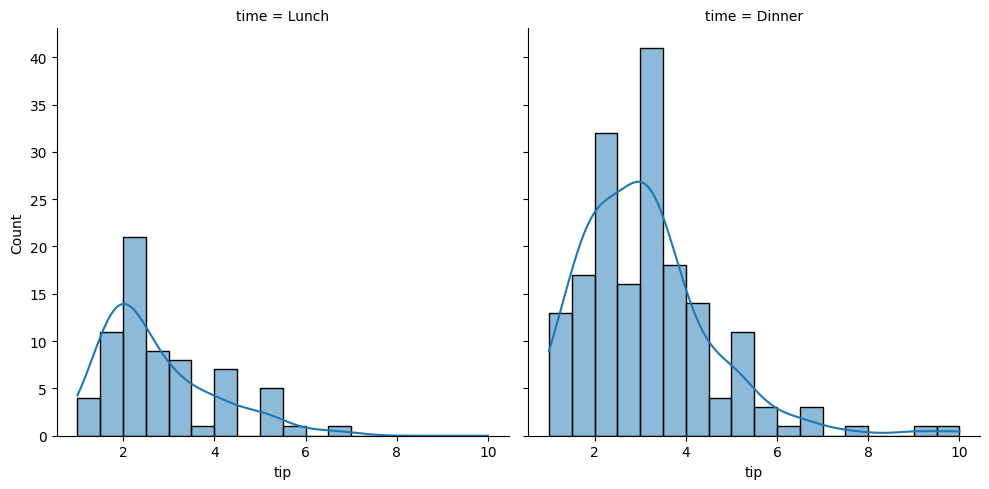

In [71]:
sns.displot(
    data=tips,
    x='tip',
    col='time',
    kde=True)

Dal grafico precedente scopriamo che è decisamente più conveniente fare il cameriere di sera, in quanto le mance sono più elevate.

In ultimo, mostriamo la funzione [`catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html), che produce grafici specificamente pensati per visualizzare come si distribuiscono i dati a seconda delle diverse categorie presenti.

c:\Users\Marco Cecca\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


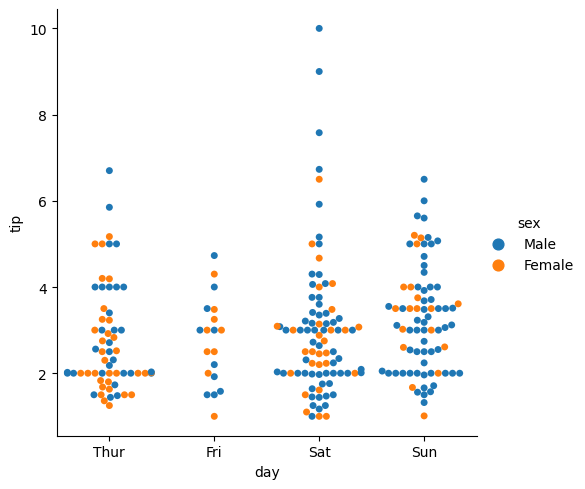

In [72]:
sns.catplot(
    data=tips,
    kind='swarm',
    x='day',
    y='tip',
    hue='sex')

Nel grafico precedente possiamo vedere come si "distribuiscono" le mance date da uomini e donne durante le diverse giornate di apertura. Nella figura successiva possiamo vedere lo stesso grafico con una differente tipologia di visualizzazione, chiamata *violin plot*, e determinata modificando il parametro `kind`:

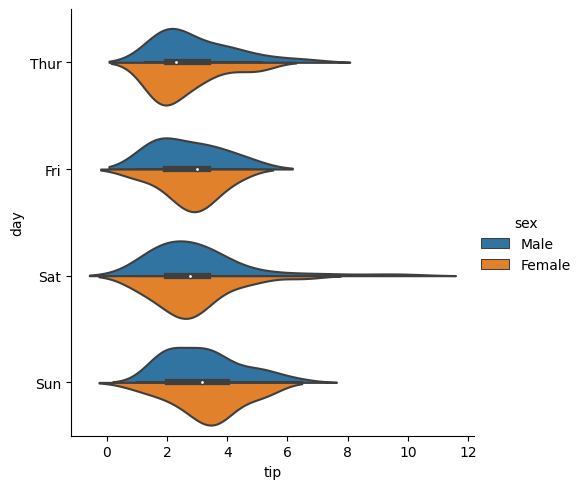

In [73]:
sns.catplot(
    data=tips,
    kind='violin',
    x='tip',
    y='day',
    hue='sex',
    split=True)

In ultimo proviamo a visualizzare la heatmap definita a partire da un array NumPy:

<AxesSubplot:>

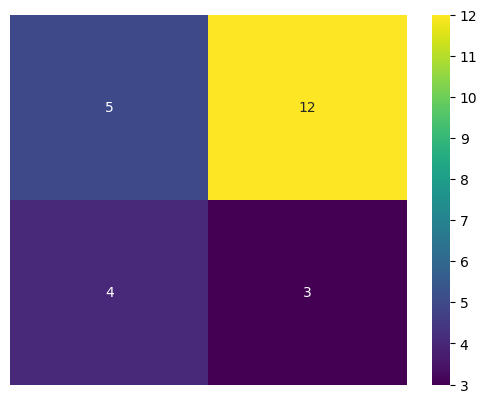

In [74]:
ar = np.array([[5, 12], [4, 3]])
sns.heatmap(ar, cmap='viridis', annot=True, xticklabels=False, yticklabels=False)

<AxesSubplot:>

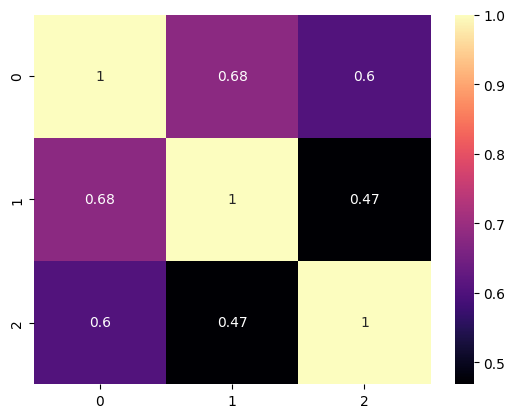

In [75]:
corr = tips.corr(method='spearman').values
sns.heatmap(corr, cmap='magma', annot=True)

In [76]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Visualizzare la distribuzione dell'età dei diversi passeggeri del Titanic in base al loro genere.

Visualizzare inoltre il rapporto tra età e numero di fratelli/sorelle/coniugi in base al genere del passeggero.

In [77]:
import pandas as pd
df = pd.read_csv('DataSet//titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


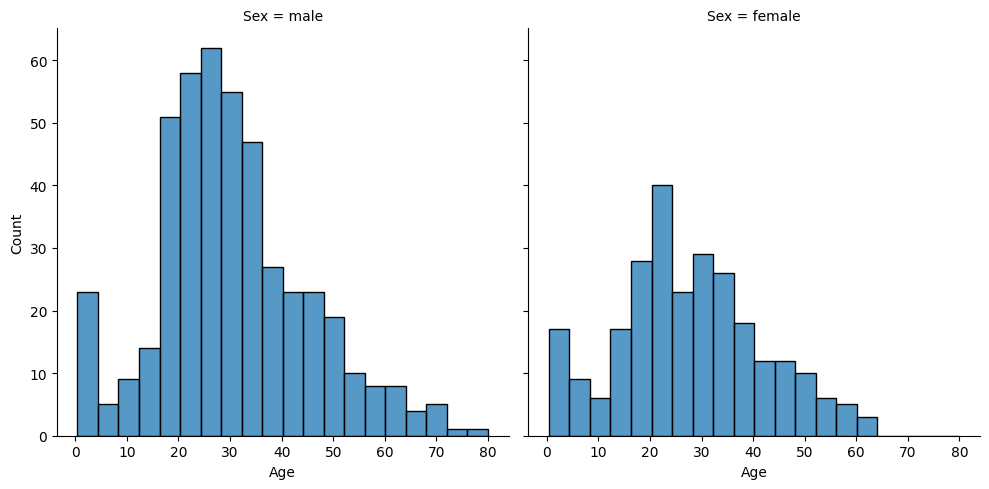

In [78]:
sns.displot(df, x='Age', col='Sex')

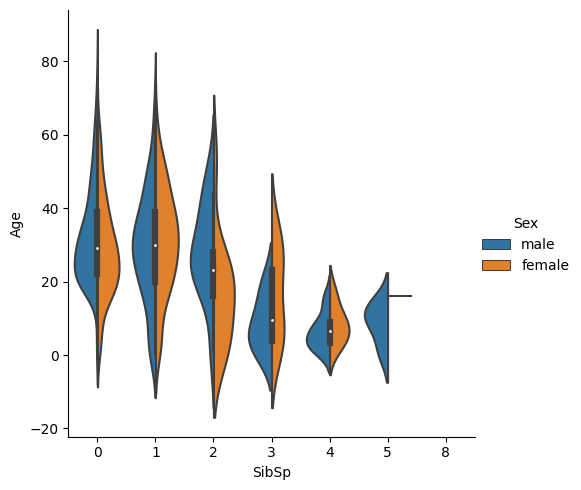

In [79]:
sns.catplot(data=df, kind='violin', x='SibSp', y='Age', hue='Sex', split=True)

## **SciPy**

**SciPy** è una *libreria*, ma anche un *framework*, di cui fanno parte le precedenti librerie. Essa contiene un vastissimo insieme di algoritmi e funzioni matematiche.

Vediamo come valutare empiricamente due distribuzioni di probabilità `norm` e `uniform`:

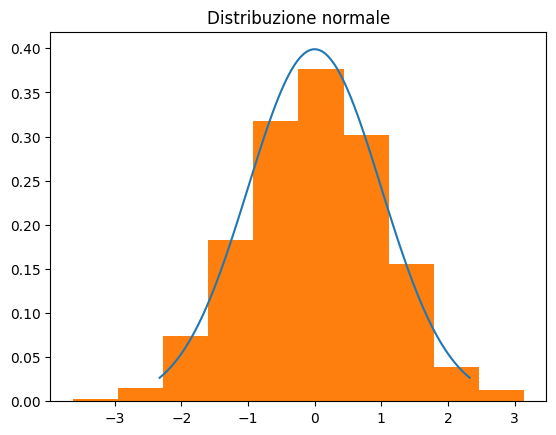

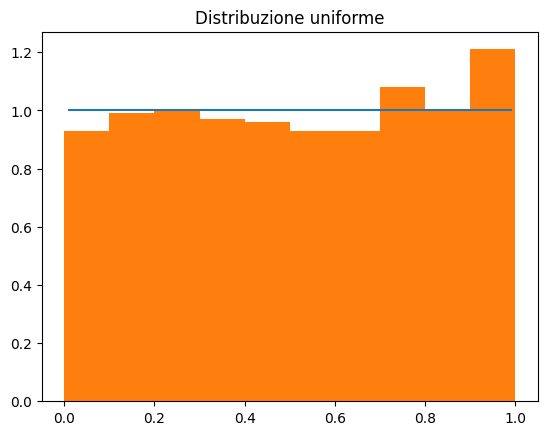

In [80]:
def plot_distribution(dtype, title):
    x = np.linspace(dtype.ppf(0.01), dtype.ppf(0.99), 100) # linspace ci assicura una distribuire 100 campioni in maniera uniforme da un minimo di 0.01 e il massimo di 0.99 
    r = dtype.rvs(size=1000) # Genero 1000 campioni appartenenti alla distribuzione dtype
    plt.plot(x, dtype.pdf(x))
    plt.hist(r, density=True)
    plt.title(title)
    plt.show()

plot_distribution(norm, 'Distribuzione normale')
plot_distribution(uniform, 'Distribuzione uniforme')

Vediamo come filtrare un segnale. Esistono diversi modi di filtrare un segnale. Un esempio è l’utilizzo di un filtro di *Savitzky – Golay*:

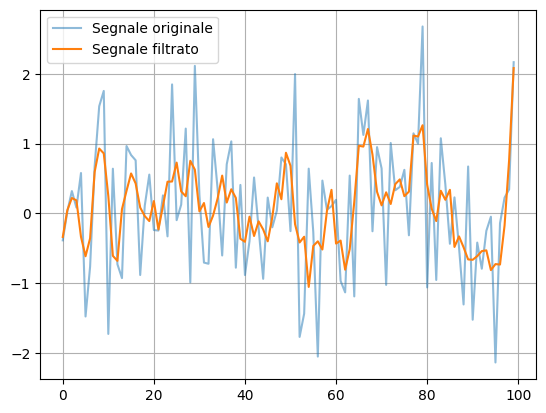

In [81]:
noise_arr = np.random.normal(0, 1, size=(100,))
filtered = savgol_filter(noise_arr, 7, 2)
plt.plot(np.arange(100), noise_arr, alpha=0.5, label='Segnale originale')
plt.plot(np.arange(100), filtered, label='Segnale filtrato')
plt.grid()
plt.legend()
plt.show()